In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import collections
from sklearn import tree
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from ipywidgets import Image
from io import StringIO
import pydotplus #pip install pydotplus

%matplotlib inline
# sns.set()

In [2]:
# Create the dataframe with dummy variables
def create_df(dic, feature_list):
    out = pd.DataFrame(dic)
    out = pd.concat([out, pd.get_dummies(out[feature_list])], axis=1)
    out.drop(feature_list, axis=1, inplace=True)
    return out

# Some feature values are present in train and absent in test and vice-versa
def intersect_features(train, test):
    common_feat = list(set(train.keys()) & set(test.keys()))
    return train[common_feat], test[common_feat]

In [3]:
features = ['Looks', 'Alcoholic_beverage', 'Eloquence', 'Money_spent']

In [4]:
df_train = {}

df_train['Looks'] = ['handsome', 'handsome', 'handsome', 'repulsive',
                     'repulsive', 'repulsive', 'handsome']
df_train['Alcoholic_beverage'] = ['yes', 'yes', 'no', 'no', 'yes',
                                  'yes', 'yes']
df_train['Eloquence'] = ['high', 'low', 'average', 'average', 'low',
                         'high', 'average']
df_train['Money_spent'] = ['lots', 'little', 'lots', 'little', 'lots',
                           'lots', 'lots']
df_train['Will_go'] = LabelEncoder().fit_transform(['+', '-', '+',
                                                    '-', '-', '+',
                                                    '+'])
df_train = create_df(df_train, features)
df_train

,Will_go,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Eloquence_low,Money_spent_little,Money_spent_lots
0,0,1,0,0,1,0,1,0,0,1
1,1,1,0,0,1,0,0,1,1,0
2,0,1,0,1,0,1,0,0,0,1
3,1,0,1,1,0,1,0,0,1,0
4,1,0,1,0,1,0,0,1,0,1
5,0,0,1,0,1,0,1,0,0,1
6,0,1,0,0,1,1,0,0,0,1


In [5]:
df_test = {}

df_test['Looks'] = ['handsome', 'handsome', 'repulsive']
df_test['Alcoholic_beverage'] = ['no', 'yes', 'yes']
df_test['Eloquence'] = ['average', 'high', 'average']
df_test['Money_spent'] = ['lots', 'little', 'lots']

df_test = create_df(df_test, features)
df_test

,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Money_spent_little,Money_spent_lots
0,1,0,1,0,1,0,0,1
1,1,0,0,1,0,1,1,0
2,0,1,0,1,1,0,0,1


In [6]:
# Some feature values are present in train and absent in test and vice-versa.
y = df_train['Will_go']

df_train, df_test = intersect_features(df_train, df_test)
df_train

,Alcoholic_beverage_yes,Eloquence_average,Looks_repulsive,Alcoholic_beverage_no,Eloquence_high,Money_spent_little,Money_spent_lots,Looks_handsome
0,1,0,0,0,1,0,1,1
1,1,0,0,0,0,1,0,1
2,0,1,0,1,0,0,1,1
3,0,1,1,1,0,1,0,0
4,1,0,1,0,0,0,1,0
5,1,0,1,0,1,0,1,0
6,1,1,0,0,0,0,1,1


In [7]:
df_test

,Alcoholic_beverage_yes,Eloquence_average,Looks_repulsive,Alcoholic_beverage_no,Eloquence_high,Money_spent_little,Money_spent_lots,Looks_handsome
0,0,1,0,1,0,0,1,1
1,1,0,0,0,1,1,0,1
2,1,1,1,0,0,0,1,0


**Draw a decision tree (by hand or in any graphics editor) for this dataset. Optionally you can also implement tree construction and draw it here.**

#### What is the entropy  S0  of the initial system? By system states, we mean values of the binary feature "Will_go" - 0 or 1 - two states in total.

In [8]:
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_clf.fit(df_train, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

[Text(186.0, 380.52, 'Money_spent_lots <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(93.0, 271.8, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(279.0, 271.8, 'Looks_repulsive <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(186.0, 163.07999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(372.0, 163.07999999999998, 'Eloquence_high <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(279.0, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(465.0, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

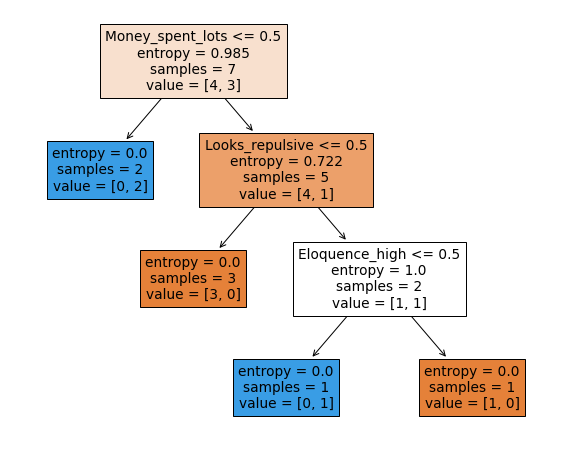

In [9]:
fig = plt.figure(figsize=(10, 8))
tree.plot_tree(tree_clf, feature_names=df_train.columns,filled=True)

A: 0.985

In [10]:
# Extra
val_scores = cross_val_score(tree_clf, df_train, y, cv=3, scoring='accuracy', n_jobs=-1)
print("Validation scores: ", val_scores)
print("Average val score: ", np.mean(val_scores))

Validation scores:  [0.66666667 0.5        0.5       ]
Average val score:  0.5555555555555555


KEKW xd

#### Let's split the data by the feature "Looks_handsome". What is the entropy  S1  of the left group - the one with "Looks_handsome". What is the entropy  S2  in the opposite group? What is the information gain (IG) if we consider such a split?

looks_awesome, entropy (s0) = 0.985

* looks_awesome (1), entropy (s1) = 0.811

* looks_awesome (1), entropy (s1) = 0.811

IG = 0.128

-

Formulas:

s0 = - (3/7) log2(3/7) - (4/7) log2(4/7)
* **Note:** 3/7 means 3 (will_go = 1) of 7 (looks_handsome), 4/7 means 4 (will_go = 0) of 4 (looks_handsome) 

s1 = - (1/4) log2(1/4) - (3/4) log2(3/4)

* **Note:** 1/4 means 1 (will_go = 1) of 4 (looks_handsome = 1), 3/4 means 3 (will_go = 0) of 4 (looks_handsome = 1) 

s2 = - (2/3) log2(2/3) - (1/3) log2(1/3)
* **Note:** 2/3 means 2 (will_go = 1) of 3 (looks_handsome = 0), 1/3 means 1 (will_go = 0) of 3 (looks_handsome = 0) 

#### What is the entropy of the state given by the list balls_left?

In [11]:
# 1 means blue ball and 0 yellow ball
balls = [1 for i in range(9)] + [0 for i in range(11)] # 9 blue and 11 yellow balls

balls_left = [1 for i in range(8)] + [0 for i in range(5)] # 8 blue - 5 yellow
balls_right = [1 for i in range(1)] + [0 for i in range(6)] # 1 blue - 6 yellow

In [12]:
def calculate_entropy(data):
    # Find out unique values in the data
    uniques = np.unique(data)
    occurences = {}
    probabilities = {}
    entropy = 0
    for i in uniques:
        occurences[i] = data.count(i) # Count the occurence of each unique value
        probabilities[i] = occurences[i] / len(data) # calculate p(sub i)
        entropy += probabilities[i] * np.log2(probabilities[i])
    
    return -entropy

In [13]:
print(calculate_entropy(balls)) # 9 blue и 11 yellow
print(calculate_entropy(balls_left)) # 8 blue и 5 yellow
print(calculate_entropy(balls_right)) # 1 blue и 6 yellow
print(calculate_entropy([1,2,3,4,5,6])) # entropy of a fair 6-sided die

0.9927744539878083
0.9612366047228759
0.5916727785823275
2.584962500721156


A: 0.961

#### What is the entropy of a fair dice? (where we look at a dice as a system with 6 equally probable states)?

A: 2.58

#### What is the information gain of splitting the initial dataset into balls_left and balls_right?

In [14]:
def information_gain(root, left, right):
    ig = calculate_entropy(root)
    for i in [left, right]:
        ig -= (len(i)/len(root)) * calculate_entropy(i)
    
    return ig

In [15]:
information_gain(balls, balls_left, balls_right)

0.16088518841412436

A: 0.1608 ~ 0.161

In [16]:
data_train = pd.read_csv('data/adult_train.csv', sep=';')
data_train.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
def strip_df(df):
    cat_cols = df.select_dtypes(exclude='number')

    for i in cat_cols.columns:
        df[i] = df[i].str.strip()

In [18]:
strip_df(data_train)

In [19]:
data_train['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [20]:
data_test = pd.read_csv('data/adult_test.csv', sep=';')
data_test.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [21]:
data_test = data_test.drop(0, axis=0).reset_index()
data_test.drop('index', axis=1, inplace=True)
data_test.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [22]:
data_train['Target'].unique()

array(['<=50K', '>50K'], dtype=object)

In [23]:
data_test['Target'].unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [24]:
# Encode target variable as integer
data_train.loc[data_train['Target'] == '<=50K', 'Target'] = 0
data_train.loc[data_train['Target'] == '>50K', 'Target'] = 1

data_test['Target'] = data_test['Target'].map({' <=50K.': 0, ' >50K.': 1}) # Another way to do that

In [25]:
strip_df(data_test)

In [26]:
data_test['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [27]:
data_train.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education_Num      int64
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_per_week     int64
Country           object
Target            object
dtype: object

In [28]:
data_train['Target'].value_counts()

0    24720
1     7841
Name: Target, dtype: int64

In [29]:
data_test.dtypes

Age                object
Workclass          object
fnlwgt            float64
Education          object
Education_Num     float64
Martial_Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_Gain      float64
Capital_Loss      float64
Hours_per_week    float64
Country            object
Target              int64
dtype: object

`Target` feature in `data_test` is `int64`, but in `data_train` is "`object`"....ummm Susge...

Pd: Maybe `map` method changed the data type of the column (and also the values) but with `loc` only changed the value

#### Primary data analysis

In [30]:
data_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,16281,73,35,461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Workclass,15318,8,Private,11210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,16281.0,NaN,NaN,NaN,189435.677784,105714.907671,13492.0,116736.0,177831.0,238384.0,1490400.0
Education,16281,16,HS-grad,5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Num,16281.0,NaN,NaN,NaN,10.072907,2.567545,1.0,9.0,10.0,12.0,16.0
Martial_Status,16281,7,Married-civ-spouse,7403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,15315,14,Prof-specialty,2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,16281,6,Husband,6523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,16281,5,White,13946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,16281,2,Male,10860,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
data_train['Target'].value_counts()

0    24720
1     7841
Name: Target, dtype: int64

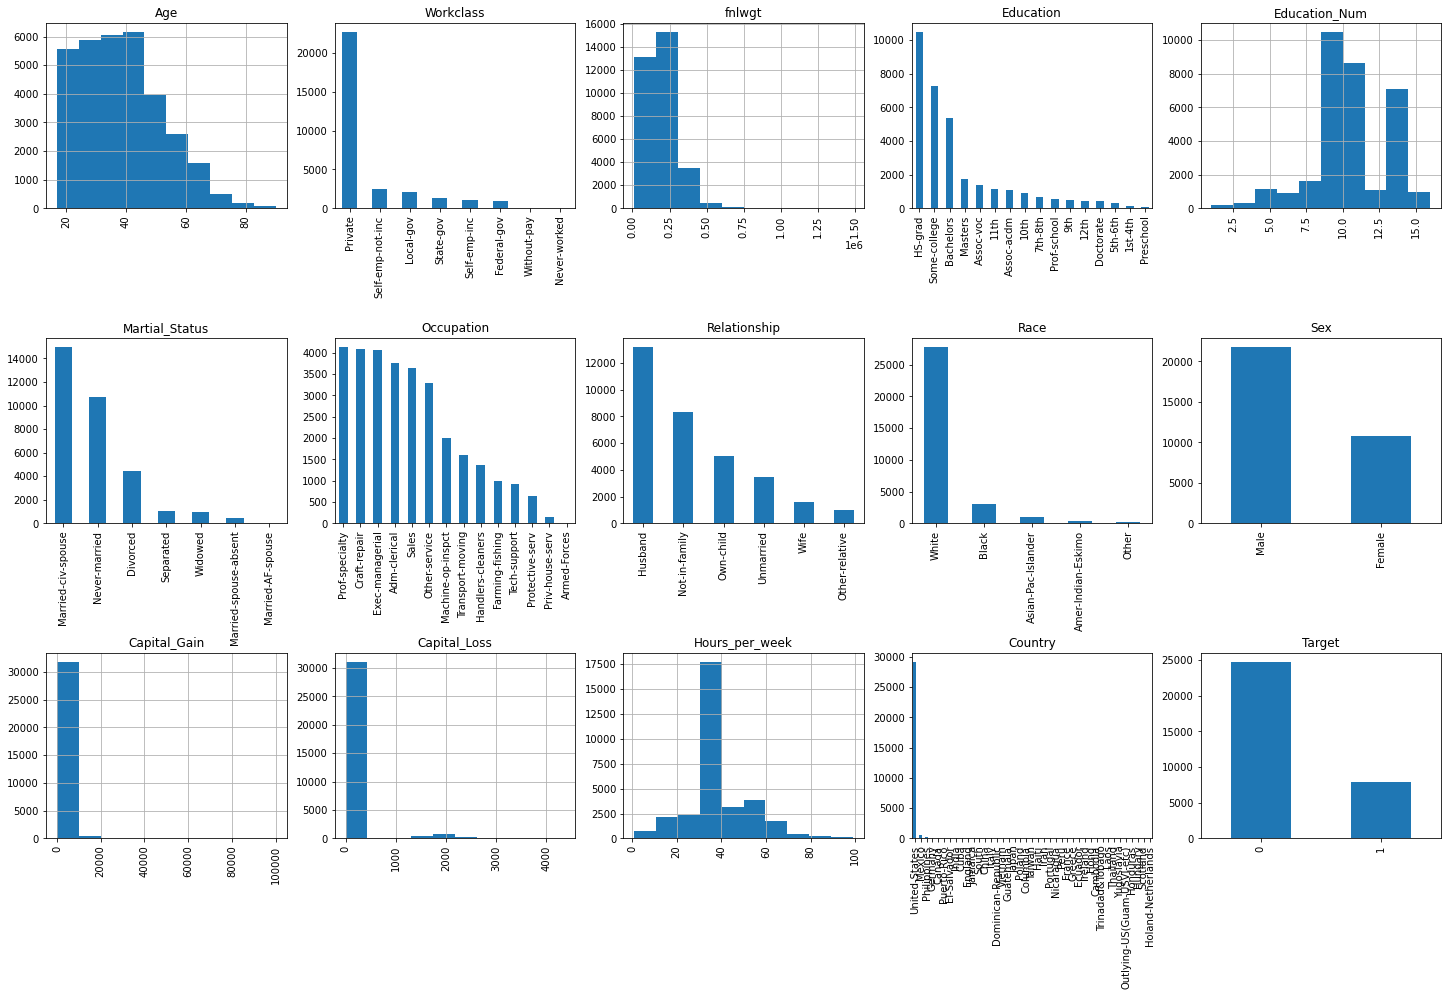

In [32]:
# Visualize the data in bar plots (categorical data) and histograms (numerical data)
rows = 3
cols = round(data_train.shape[1] / rows)

fig, axes = plt.subplots(rows, cols, figsize=(25, 15))
ax_flat = axes.ravel()

for i, column in enumerate(data_train.columns):
    ax_flat[i].set_title(column)
    if data_train.dtypes[column] == object:
        data_train[column].value_counts().plot(kind='bar', ax=ax_flat[i])
    else:
        data_train[column].hist(ax=ax_flat[i]) # also...   .plot(kind='hist', ax=...)    
    ax_flat[i].tick_params(axis='x', labelrotation = 90)

plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [33]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [34]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             16281 non-null  object 
 1   Workclass       15318 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   Education       16281 non-null  object 
 4   Education_Num   16281 non-null  float64
 5   Martial_Status  16281 non-null  object 
 6   Occupation      15315 non-null  object 
 7   Relationship    16281 non-null  object 
 8   Race            16281 non-null  object 
 9   Sex             16281 non-null  object 
 10  Capital_Gain    16281 non-null  float64
 11  Capital_Loss    16281 non-null  float64
 12  Hours_per_week  16281 non-null  float64
 13  Country         16007 non-null  object 
 14  Target          16281 non-null  int64  
dtypes: float64(5), int64(1), object(9)
memory usage: 1.9+ MB


Different types of values (Age, fnlwgt, Target, etc). We need to cast them into a common types to keep onsistency on data types.

In [35]:
# Cast data types
data_train['Target'] = data_train['Target'].astype(int)

data_test['Age'] = data_test['Age'].astype(int)
data_test['fnlwgt'] = data_test['fnlwgt'].astype(int)
data_test['Education_Num'] = data_test['Education_Num'].astype(int)
data_test['Capital_Gain'] = data_test['Capital_Gain'].astype(int)
data_test['Capital_Loss'] = data_test['Capital_Loss'].astype(int)
data_test['Hours_per_week'] = data_test['Hours_per_week'].astype(int)

Why cast `float` into `int`? Idk (the exercise did that). I would cast from `int` to `float`. Maybe most of values don't have decimal (fractional) part, or at least that's we can notice from `describe` method, specifically in the `min 25% 50% 75% max` of each numerical feature.

In [36]:
# Select the name of categorical and numerical features from data
cat_cols = data_train.select_dtypes(exclude='number').columns.to_list()
num_cols = data_train.select_dtypes(include='number').columns.to_list()

print(cat_cols)
print(num_cols)

['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']
['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Target']


In [37]:
# Find out how many missing values there are
data_train.isna().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education_Num        0
Martial_Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours_per_week       0
Country            583
Target               0
dtype: int64

In [38]:
# Fill missing values with the median of his respective feature
for cat in cat_cols:
    data_train[cat].fillna(data_train[cat].mode()[0], inplace=True) # mode is the most frecuently
    data_test[cat].fillna(data_train[cat].mode()[0], inplace=True)

for num in num_cols:
    data_train[num].fillna(data_train[num].median(), inplace=True)
    data_test[num].fillna(data_test[num].median(), inplace=True)

In [39]:
# Again, let's see if there is any missing value
data_train.isna().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education_Num     0
Martial_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_per_week    0
Country           0
Target            0
dtype: int64

**NOTE:** It's recommended to do data imputation (and other data preprocessing steps) with scikit-learn, because we can automate the process with pipelines and even prevent data leakage (cross validation to all processes)

In [40]:
# Encode categorical feature throught get_dummies
data_train = pd.concat([data_train[num_cols], pd.get_dummies(data_train[cat_cols])], axis=1)
data_test = pd.concat([data_test[num_cols], pd.get_dummies(data_test[cat_cols])], axis=1)

In [41]:
data_train.shape, data_test.shape

((32561, 106), (16281, 105))

In [42]:
set(data_train.columns) - set(data_test.columns)

{'Country_Holand-Netherlands'}

In [43]:
# As data_test doesn't have 'Country_Holand-Netherlands' column, we can create one and fill with 0's
data_test['Country_Holand-Netherlands'] = 0

In [44]:
set(data_train.columns) - set(data_test.columns)

set()

Now we can start building a machine learning model, but first, we need to split the data in train, test sets.

In [45]:
X_train = data_train.drop(['Target'], axis=1)
y_train = data_train['Target']

X_test = data_test.drop(['Target'], axis=1)
y_test = data_test['Target']

### Decision Tree Classifier

#### Base model

In [46]:
# Build a Decision Tree
tree_clf_base = DecisionTreeClassifier(random_state=17) # 17 because the exercise says so (to reproduce results)
tree_clf_base.fit(X_train, y_train)

DecisionTreeClassifier(random_state=17)

In [47]:
# Evaluate the model's accuracy
y_pred_tree_base = tree_clf_base.predict(X_test)
print("Base tree model accuracy", accuracy_score(y_test, y_pred_tree_base))

Base tree model accuracy 0.8015478164731896


#### What is the test set accuracy of a decision tree with maximum tree depth of 3 and random_state = 17?

In [48]:
tree_clf = DecisionTreeClassifier(random_state=17, max_depth=3)
tree_clf.fit(X_train, y_train)
y_pred_tree_clf = tree_clf.predict(X_test)
print("Tree model accuracy", accuracy_score(y_test, y_pred_tree_clf))

Tree model accuracy 0.8447884036607088


A: 0.844 ~ 0.845

#### Hyperparameter tuning

In [49]:
# Apply hyperparameter tuning in a Decision 
tree_params = {'max_depth': range(2, 11)}

grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=17), tree_params, cv=5, n_jobs=-1, verbose=2)
grid_tree.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': range(2, 11)}, verbose=2)

In [50]:
grid_tree.best_params_

{'max_depth': 9}

In [51]:
grid_tree.best_score_

0.8565770273854106

#### What is the test set accuracy of a decision tree with maximum depth of 9 and random_state = 17?

In [52]:
y_pred_grid_tree = grid_tree.predict(X_test)
print("Tree grid accuracy", accuracy_score(y_test, y_pred_grid_tree))

Tree grid accuracy 0.847798046803022


No mejoró mucho xd

### RandomForestClassifier

#### Base model

In [53]:
base_forest = RandomForestClassifier(n_estimators=100, random_state=17, n_jobs=-1)
base_forest.fit(X_train, y_train)
y_pred_base_forest = base_forest.predict(X_test)
print("Base forest model accuracy:", accuracy_score(y_test, y_pred_base_forest))

Base forest model accuracy: 0.8585467723112831


#### Hyperparameter tuning

In [54]:
forest_params = {'max_depth': range(10, 21),
                 'max_features': range(5, 105, 20)}

from joblib import parallel_backend

with parallel_backend('threading', n_jobs=4):
    grid_forest = GridSearchCV(RandomForestClassifier(random_state=17), param_grid=forest_params, cv=5, verbose=2)
    grid_forest.fit(X_train, y_train)

Fitting 5 folds for each of 55 candidates, totalling 275 fits
[CV] END .......................max_depth=10, max_features=5; total time=   2.1s
[CV] END .......................max_depth=10, max_features=5; total time=   2.1s
[CV] END .......................max_depth=10, max_features=5; total time=   2.2s
[CV] END .......................max_depth=10, max_features=5; total time=   2.2s
[CV] END .......................max_depth=10, max_features=5; total time=   1.9s
[CV] END ......................max_depth=10, max_features=25; total time=   5.2s
[CV] END ......................max_depth=10, max_features=25; total time=   5.2s
[CV] END ......................max_depth=10, max_features=25; total time=   5.2s
[CV] END ......................max_depth=10, max_features=25; total time=   5.2s
[CV] END ......................max_depth=10, max_features=25; total time=   5.3s
[CV] END ......................max_depth=10, max_features=45; total time=   8.4s
[CV] END ......................max_depth=10, ma

[CV] END ......................max_depth=13, max_features=85; total time=  17.5s
[CV] END .......................max_depth=14, max_features=5; total time=   2.4s
[CV] END .......................max_depth=14, max_features=5; total time=   2.5s
[CV] END ......................max_depth=14, max_features=25; total time=   6.5s
[CV] END ......................max_depth=14, max_features=25; total time=   6.8s
[CV] END ......................max_depth=14, max_features=25; total time=   6.8s
[CV] END ......................max_depth=13, max_features=85; total time=  17.4s
[CV] END ......................max_depth=14, max_features=25; total time=   6.5s
[CV] END ......................max_depth=14, max_features=25; total time=   7.1s
[CV] END ......................max_depth=14, max_features=45; total time=  10.3s
[CV] END ......................max_depth=14, max_features=45; total time=  10.3s
[CV] END ......................max_depth=14, max_features=45; total time=  10.5s
[CV] END ...................

[CV] END .......................max_depth=18, max_features=5; total time=   3.0s
[CV] END ......................max_depth=18, max_features=25; total time=   7.8s
[CV] END ......................max_depth=18, max_features=25; total time=   8.0s
[CV] END ......................max_depth=18, max_features=25; total time=   7.5s
[CV] END ......................max_depth=17, max_features=85; total time=  21.1s
[CV] END ......................max_depth=18, max_features=25; total time=   8.3s
[CV] END ......................max_depth=18, max_features=25; total time=   8.9s
[CV] END ......................max_depth=18, max_features=45; total time=  12.6s
[CV] END ......................max_depth=18, max_features=45; total time=  12.8s
[CV] END ......................max_depth=18, max_features=45; total time=  12.6s
[CV] END ......................max_depth=18, max_features=45; total time=  12.4s
[CV] END ......................max_depth=18, max_features=45; total time=  11.5s
[CV] END ...................

In [56]:
y_pred_grid_forest = grid_forest.predict(X_test)
print("Forest grid accuracy:", accuracy_score(y_test, y_pred_grid_forest))

Forest grid accuracy: 0.8628462625145875


Better!